## **Simple Linear Regression**
In this regression task where we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing the libraries 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
from sklearn import linear_model

### Importing file "score.csv" with the help of pandas 

In [3]:
df =pd.read_csv("score.csv")

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Visualizing a graph between no. of hours of study and scores with the help of matplotlib

Text(0.5, 1.0, 'Graph between hours of study and scores')

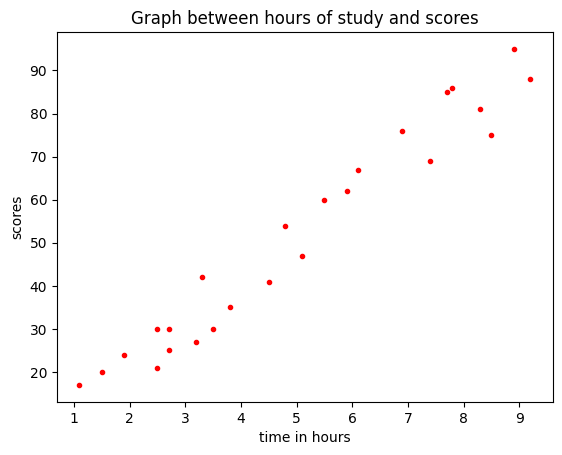

In [5]:
%matplotlib inline
plt.scatter(df.Hours,df.Scores, color="red", marker=".")
plt.xlabel("time in hours")
plt.ylabel("scores")
plt.title("Graph between hours of study and scores")

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Inisializing dependent and independent features

In [7]:
X = df.iloc[:, :-1].values # independent features
y = df.iloc[:, 1].values # dependent features

### Importing Train_test_split from model_selection

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Importing LinearRegression model from linear_model

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Training of the whole dataset completed till here

### checking the score(accuracy) of model I trained

In [10]:
regressor.score(X_test, y_test)

0.9454906892105355

In [11]:
# coefficient of best-fit line
regressor.coef_ = regressor.coef_
regressor.coef_

array([9.91065648])

In [12]:
# intercept of the best-fit line
regressor.intercept_ = regressor.intercept_
regressor.intercept_

2.0181600414346974

### The formula for best-bit line

In [13]:
line = regressor.coef_ * X + regressor.intercept_

### Plotting scatter plot for showing best-fit line and datapoints

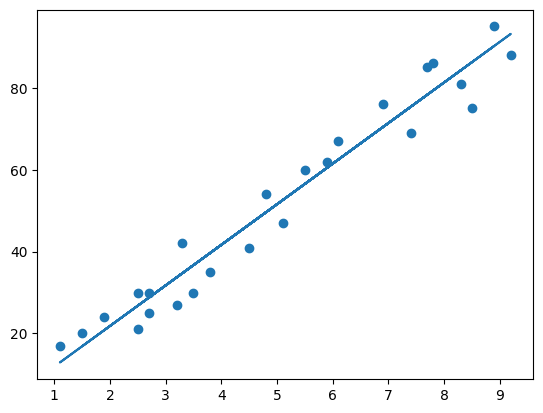

In [14]:
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) 
y_pred# Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Now with the help of pandas I formed a new dataset of actual value and predicted value

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### prediction of score when a student studied for 9.25 hours

In [17]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print(own_pred[0])

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535
93.69173248737535


### finding mean_absolute_error to find the absolute error in our model

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
